In [1]:
log_file = "bakeoff_short.log"

import numpy as np
import pandas as pd
import coba.benchmarks as cb

result = cb.Result.from_file(log_file)
l,s,b  = result.to_pandas()

#This is useful for experiments that are still running. It gets the simulation ids that all learners have tested.
complete_ids = b.simulation_id.value_counts().reset_index(name="count").query(f"count == {len(l)}")["index"]

#The data structure returned from COBA stores results in an array column. These four lines turns it into a table format.
repeat_cols = { col:np.repeat(b[col].values, b['N'].apply(len)) for col in b.columns.drop(['C','A','N','reward']) }
spread_cols = { col:np.concatenate(b[col].values) for col in ['reward'] }
index_col   = { "index":1+np.concatenate([np.arange(i) for i in b['reward'].apply(len)]) }

r = pd.DataFrame({**repeat_cols, **spread_cols, **index_col})

In [2]:
def create_plot(source=None, span=None, only_complete=False):
    
    if source is not None:
        sim_ids = s[ s['pipe'].str.contains(source) ].simulation_id.values
    else:
        sim_ids = s.simulation_id.values

        
    if only_complete:
        rf = r[r.simulation_id.isin(sim_ids) & r.simulation_id.isin(complete_ids)]
    else:
        rf = r[r.simulation_id.isin(sim_ids)]
        
    
    df = pd.merge(rf,l).sort_values(['full_name']).groupby(['full_name', 'index']).agg({"reward":"mean"}).unstack(level=0)
    
    if span is None:
        df.expanding().mean().plot()
    else:
        df.ewm(span=span).mean().plot()

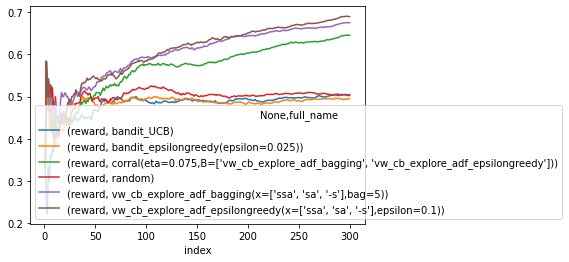

In [3]:
#the plot of results from just simulation 3
create_plot('{"OpenmlSimulation":3}')

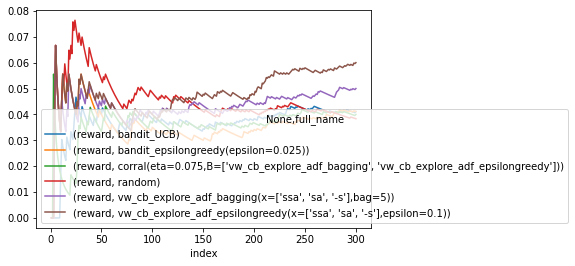

In [4]:
#the plot of results from just simulation 6
create_plot('{"OpenmlSimulation":6}')

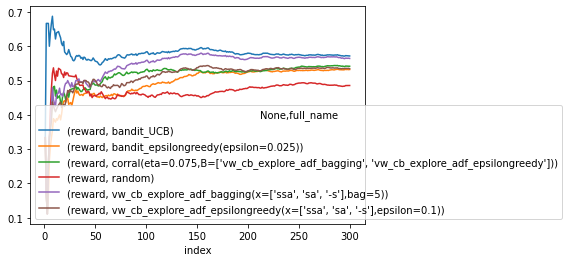

In [16]:
#the plot of results from just simulation 8
create_plot('{"OpenmlSimulation":8}')

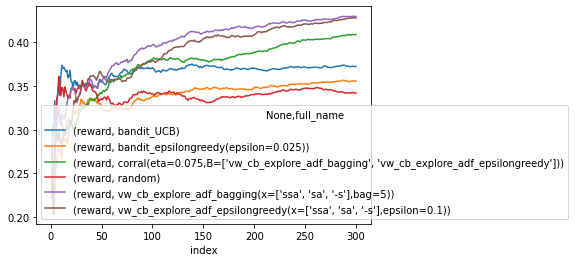

In [18]:
#the average of all simulations
create_plot()